## Clustering HCR data (SuppFigure 4)

To examine similarities between the snRNAseq and HCR datasets, we clustered HCR data using the Seurat pipeline

#### Import libraries

In [1]:
library(Seurat)
library('xlsx')
library(data.table)

Attaching SeuratObject



#### Formatting the HCR data as a digital expression matrix

Thresholding cells based on spot counts

In [2]:
ct.t <- readRDS('HCR_snRNAseq_files/counts_no_threshold.rds')

In [3]:
ct.t[ct.t<5]=0

In [ ]:
saveRDS(ct.t, file='HCR_snRNAseq_files/counts_threshold.rds')

In [ ]:
ct.t <- readRDS(file='HCR_snRNAseq_files/counts_threshold.rds')

In [4]:
ct.mask <- ct.t == 0

In [7]:
int <- readRDS(file = 'HCR_snRNAseq_files/intensity.rds')

In [8]:
library(tidyverse)
int2 <- int %>% remove_rownames %>% column_to_rownames(var="id")

int.t <- transpose(int2)

int.t <- as.data.frame(t(as.matrix(int2)))

int.t.masked <- replace(int.t, !ct.mask, 0)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.1     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::between()   masks data.table::between()
x dplyr::filter()    masks stats::filter()
x dplyr::first()     masks data.table::first()
x dplyr::lag()       masks stats::lag()
x dplyr::last()      masks data.table::last()
x purrr::transpose() masks data.table::transpose()



In [9]:
saveRDS(int.t.masked, file='HCR_snRNAseq_files/intensity_threshold.rds')

In [10]:
saveRDS(ct.t, file='HCR_snRNAseq_files/counts_threshold.rds')

In [ ]:
int <- readRDS(file='HCR_snRNAseq_files/intensity_threshold.rds')

#### Creating a seurat object based on cell intensity values

In [11]:
ct.t <- readRDS(file='HCR_snRNAseq_files/counts_threshold.rds')
rownames(ct.t) <- c('Drd2','Drd3','Esr1','Foxp2','Met','Nts','Onecut2','Pax6','Samd3','Sst',"Tacr1",'Slc32a1','Slc17a6','Col15a1','Crhr2')

In [12]:
int <- readRDS(file='HCR_snRNAseq_files/intensity_threshold.rds')
rownames(int) <- c('Drd2','Drd3','Esr1','Foxp2','Met','Nts','Onecut2','Pax6','Samd3','Sst',"Tacr1",'Slc32a1','Slc17a6','Col15a1','Crhr2')

In [13]:
LS.HCR<-CreateSeuratObject(ct.t)

In [14]:
saveRDS(LS.HCR, "HCR_snRNAseq_files/LS_HCR_ct_threshold.rds")

In [15]:
LS.HCR <- readRDS("HCR_snRNAseq_files/LS_HCR_ct_threshold.rds")

In [16]:
drd2 <- int[1,]
drd3 <- int[2,]
esr1 <- int[3,]
foxp2 <- int[4,]
met <- int[5,]
nts <- int[6,]
onecut2 <- int[7,]
pax6 <- int[8,]
samd3 <- int[9,]
sst <- int[10,]
tacr1 <- int[11,]
vgat <- int[12,]
vglut2<- int[13,]
col15a1 <- int[14,]
crhr2 <- int[15,] 

In [17]:
LS.HCR@meta.data$drd2 <- unlist(drd2)
LS.HCR@meta.data$drd3 <- unlist(drd3)
LS.HCR@meta.data$esr1 <- unlist(esr1)
LS.HCR@meta.data$foxp2 <- unlist(foxp2)
LS.HCR@meta.data$met <- unlist(met)
LS.HCR@meta.data$nts <- unlist(nts)
LS.HCR@meta.data$onecut2 <- unlist(onecut2)
LS.HCR@meta.data$pax6 <- unlist(pax6)
LS.HCR@meta.data$samd3 <- unlist(samd3)
LS.HCR@meta.data$sst <- unlist(sst)
LS.HCR@meta.data$tacr1 <- unlist(tacr1)
LS.HCR@meta.data$vgat <- unlist(vgat)
LS.HCR@meta.data$vglut2 <- unlist(vglut2)
LS.HCR@meta.data$col15a1 <- unlist(col15a1)
LS.HCR@meta.data$crhr2 <- unlist(crhr2)

In [18]:
LS.HCR <- subset(x = LS.HCR, subset = nCount_RNA > 0 & nCount_RNA < 2000 & nFeature_RNA > 1) 

In [19]:
library('ggplot2')

In [20]:
#sampling only a subset of cells due to the size of the dataset
#set.seed(140)
#sam <- sample(nrow(LS.HCR@meta.data), size=20000)

In [21]:
#sam <- rownames(LS.HCR@meta.data[sam,])
#LS.HCR <- subset(LS.HCR, cells=sam)

In [22]:
LS.HCR@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,drd2,drd3,esr1,foxp2,met,nts,onecut2,pax6,samd3,sst,tacr1,vgat,vglut2,col15a1,crhr2
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WT-2-S4 _ 9783,SeuratProject,91,3,0.615064,0.213441,0.000000,0.000000,1.933600,0.000000,0.000000,0.000000,0.000000,0.078304,0.000000,0.000000,0.000000,0.000000,0.000000
WT-3-S4 _ 2845,SeuratProject,130,4,1.752996,0.049256,0.000000,1.411996,2.522142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.298060,0.000000
WT-5-S6 _ 6885,SeuratProject,155,4,0.000000,0.000000,0.000000,1.327377,0.000000,0.000000,0.000000,0.000000,0.000000,0.088408,5.339819,0.000000,0.253856,0.000000,2.866932
WT-1-S5 - 3340,SeuratProject,910,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.718137
WT-4-S5 _ 296,SeuratProject,880,8,0.000000,0.141452,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.131348,0.166711,0.526657,0.000000,1.280647,0.000000,0.000000
WT-7-S6 _ 4263,SeuratProject,546,6,0.000000,1.492825,0.000000,0.000000,0.000000,0.000000,0.000000,0.222282,0.065674,0.247541,2.706536,0.000000,0.510238,0.000000,3.769953
WT-2-S6 _ 1771,SeuratProject,418,3,1.257914,0.075778,0.000000,1.292014,0.000000,0.132611,0.000000,0.109878,0.138926,0.433197,0.707261,0.000000,0.122508,0.000000,0.558231
WT-4-S4 _ 6846,SeuratProject,111,2,0.825980,0.000000,0.000000,0.620116,0.603698,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.178078,0.116193
WT-7-S6 _ 9435,SeuratProject,103,2,0.325845,0.000000,0.000000,0.000000,0.628957,0.000000,0.000000,0.000000,0.137663,0.137663,0.000000,0.000000,0.000000,0.176815,0.000000


#### Data scaling, dimensionality reduction, and visualization

In [23]:
LS.HCR <- ScaleData(object = LS.HCR, features = rownames(x =LS.HCR), vars.to.regress = c('nCount_RNA','nFeature_RNA','drd2','drd3','nts','sst','crhr2','foxp2','col15a1','vgat','vglut2','pax6','tacr1','esr1','met','samd3','onecut2'))

Regressing out nCount_RNA, nFeature_RNA, drd2, drd3, nts, sst, crhr2, foxp2, col15a1, vgat, vglut2, pax6, tacr1, esr1, met, samd3, onecut2

Centering and scaling data matrix



In [24]:
LS.HCR<- RunPCA(object = LS.HCR, features = rownames(LS.HCR), verbose = FALSE)

Warning message in irlba(A = t(x = object), nv = npcs, ...):
"You're computing too large a percentage of total singular values, use a standard svd instead."


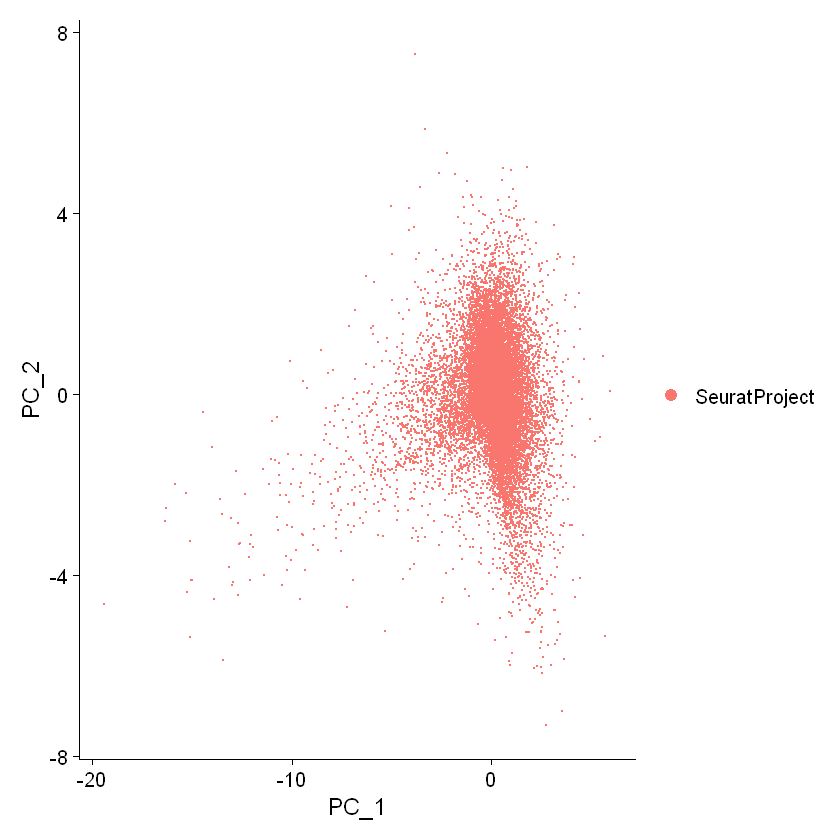

In [25]:
DimPlot(LS.HCR, reduction='pca')

Warning message in ElbowPlot(LS.HCR):
"The object only has information for 14 reductions"


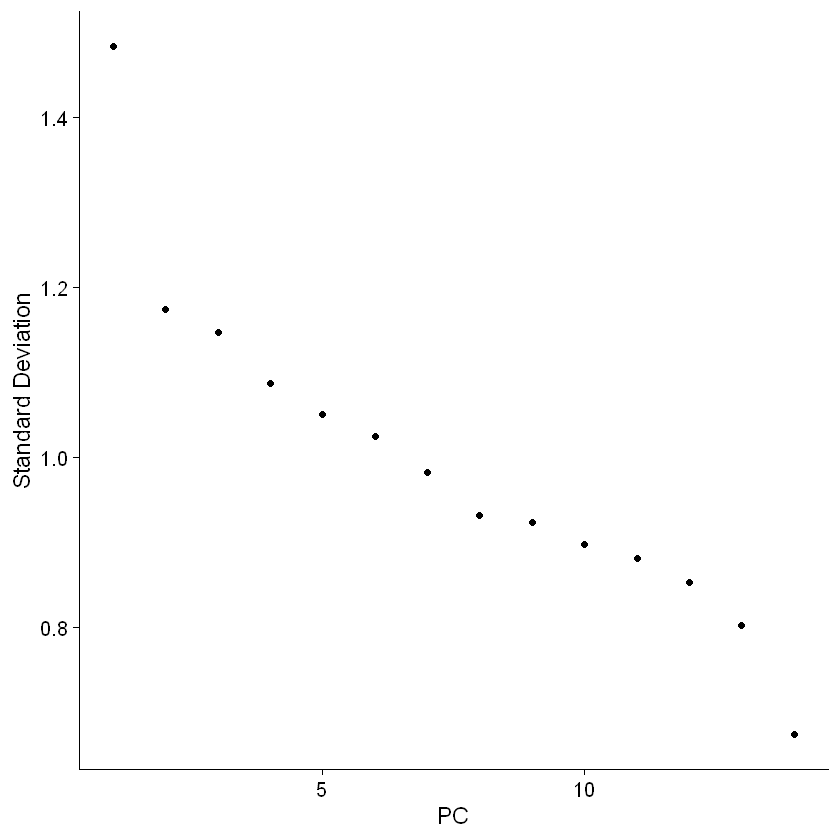

In [26]:
ElbowPlot(LS.HCR)

In [27]:
LS.HCR <- RunUMAP(LS.HCR, reduction='pca', dims=1:13)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
09:21:00 UMAP embedding parameters a = 0.9922 b = 1.112

09:21:00 Read 20000 rows and found 13 numeric columns

09:21:00 Using Annoy for neighbor search, n_neighbors = 30

09:21:00 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:21:03 Writing NN index file to temp file C:\Users\STUBER~1\AppData\Local\Temp\RtmpmIRxWk\file263c7876138a

09:21:03 Searching Annoy index using 1 thread, search_k = 3000

09:21:08 Annoy recall = 100%

09:21:09 Commencing smooth kNN distance calibration using 1 

In [28]:
LS.HCR<- FindNeighbors(object =LS.HCR, dims=1:13)

Computing nearest neighbor graph

Computing SNN



In [29]:
LS.HCR<- FindClusters(object = LS.HCR, resolution = 0.15)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 20000
Number of edges: 656073

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9587
Number of communities: 14
Elapsed time: 1 seconds


In [30]:
?FindClusters

In [ ]:
library(ggplot2)

In [31]:
saveRDS(LS.HCR, file="HCR_snRNAseq_files/LS_HCR_int_threshold_UMAP_scaled-int.rds")

#### Looking at the clustered data

In [77]:
LS.HCR <- readRDS(file="HCR_snRNAseq_files/LS_HCR_int_threshold_UMAP_scaled-int.rds")

In [78]:
table(Idents(LS.HCR))


    0     1     2     3     4     5     6     7     8     9    10    11    12 
25467 23076 22898 21621 17733 14264 12888  9089  6291  5813  5675  5307  3278 
   13 
 2237 

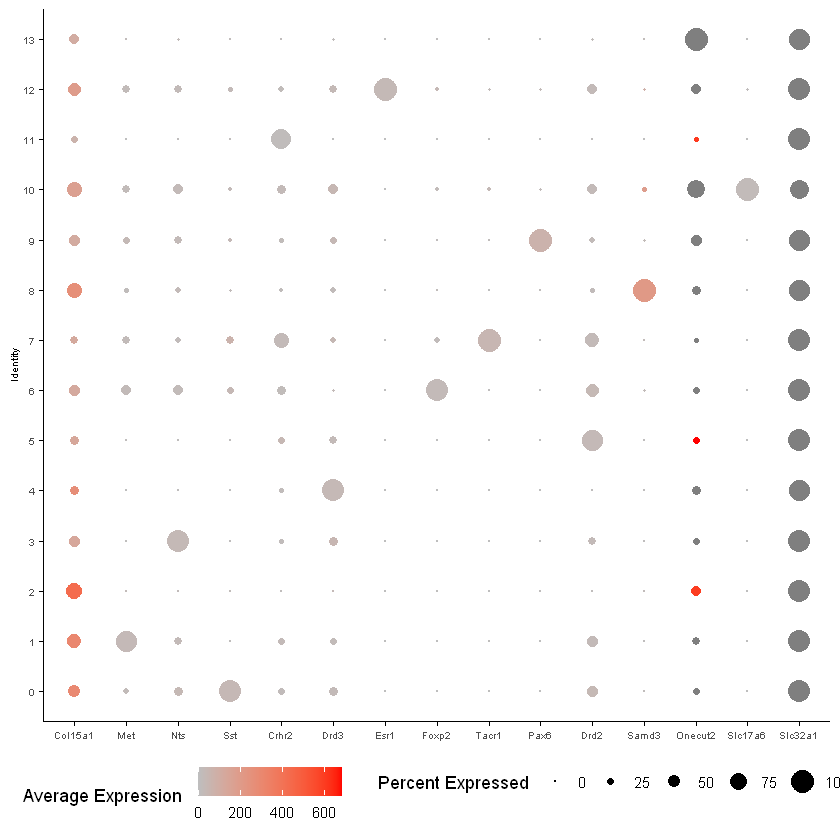

In [82]:
DotPlot(LS.HCR,feature=c('Col15a1','Met','Nts','Sst','Crhr2','Drd3','Esr1','Foxp2','Tacr1','Pax6','Drd2','Samd3','Onecut2','Slc17a6','Slc32a1'), scale=FALSE, cols=c('gray','red'), assay='RNA')+
theme_classic() +
    theme(axis.line = element_line(color="black",size=0.25), 
          axis.text.y=element_text(size=6),
          axis.title.x = element_blank(), 
          axis.title.y = element_text(size=6),
          axis.text.x=element_text(size=6) ,
          plot.title=element_blank(),
          axis.ticks = element_line(colour = "black", size = .25),
          legend.position='bottom') 
#ggsave("HCR_snRNAseq_files/LS_HCR_discplot.pdf", width=6, height=5)

Rename idents based on supervised cluster labeling

In [83]:
new.ident <- c('Sst','Met','Col15a1','Nts','Drd3','Drd2','Foxp2','Tacr1','Samd3','Pax6','Slc17a6','Crhr2','Esr1','Onecut2')
names(x = new.ident) <- levels(x =LS.HCR)
LS.HCR <- RenameIdents(object =LS.HCR, new.ident)

In [84]:
table(Idents(LS.HCR))


    Sst     Met Col15a1     Nts    Drd3    Drd2   Foxp2   Tacr1   Samd3    Pax6 
  25467   23076   22898   21621   17733   14264   12888    9089    6291    5813 
Slc17a6   Crhr2    Esr1 Onecut2 
   5675    5307    3278    2237 

In [85]:
mycols <- c('Col15a1'='#D2797F','Sst'='#D47D9A','Esr1'='#C579D2','Pax6'='#9D79D2','Tacr1'='#8189D5','Foxp2'='#85A0D6','Drd3'='#88B9D7','Crhr2'='#88D7D7','Nts'='#90DAB9','Met'='#94DB96','Samd3'='#DDE0A3','Onecut2'='#E7BFB6')

Warning message in order(as.integer(names(mycols))):
"NAs introduced by coercion"


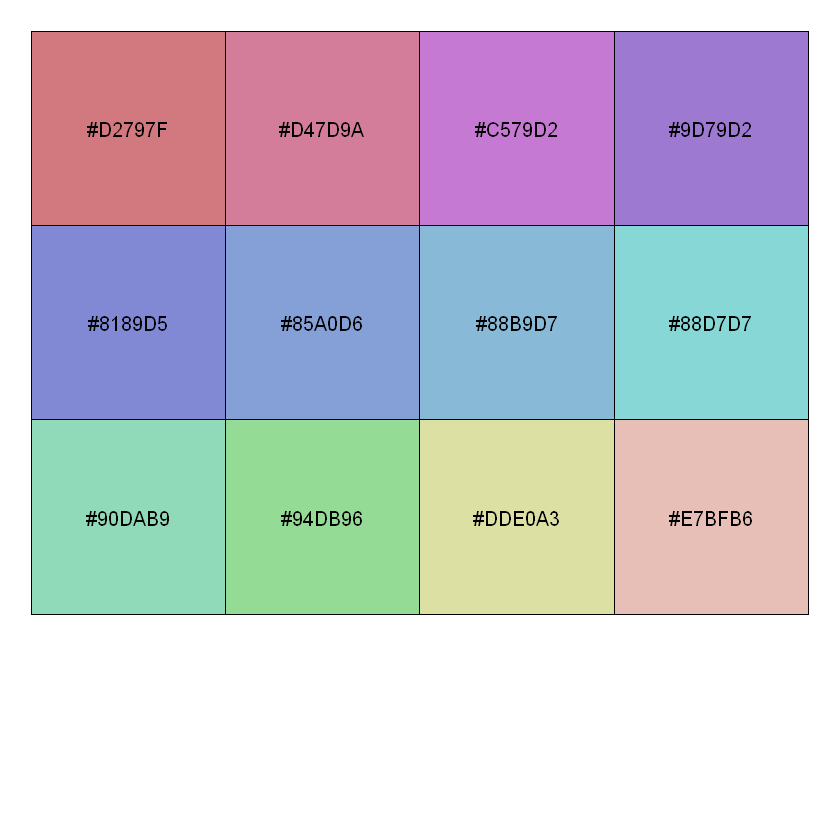

In [86]:
my_cols2 <- mycols[order(as.integer(names(mycols)))]
scales::show_col(my_cols2)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



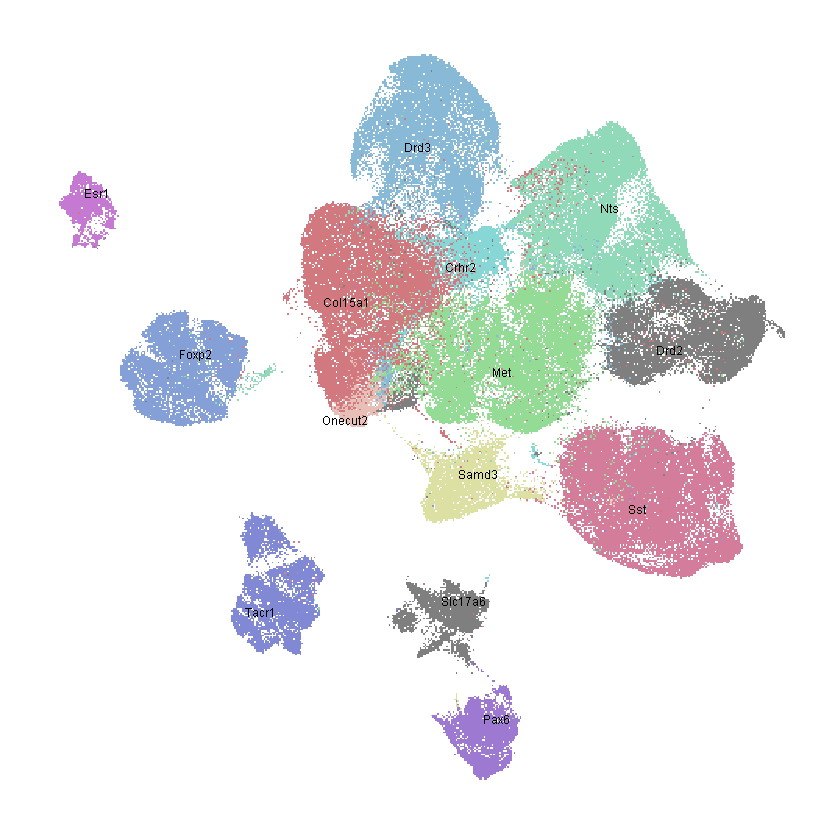

In [87]:
DimPlot(object = LS.HCR, reduction = "umap", label = TRUE, repel = TRUE, pt.size = 0.25, label.size=2.5, cols=my_cols2) +
theme_classic() + 
NoLegend() + 
theme(axis.line=element_blank(),
     axis.text=element_blank(),
     axis.title=element_blank(),
     axis.ticks=element_blank())

#### Quantifying gene expression

In [143]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(LS.HCR@assays$RNA@data[,which(Idents(object=LS.HCR) %in% new.ident[i])]))}

In [91]:
celltype<-vector()
for (i in 1:dim(LS.HCR@meta.data)[1]){
    celltype[i]<-toString(new.ident[LS.HCR@meta.data$seurat_clusters[i]])
}
LS.HCR@meta.data$celltype<-celltype

In [144]:
barcode_names <- unique(paste(Idents(LS.HCR),"_barcode",sep=""))

In [96]:
LS.HCR@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,drd2,drd3,esr1,foxp2,met,nts,onecut2,...,samd3,sst,tacr1,vgat,vglut2,col15a1,crhr2,RNA_snn_res.0.15,seurat_clusters,celltype
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<chr>
WT-1-S2 _ 1,SeuratProject,118,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,...,0,0.000000,0.808824,0,10.042892,0.000000,0.000000,3,3,Nts
WT-1-S2 _ 2,SeuratProject,86,2,0.000000,0.814951,0.000000,0.000000,9.099265,0.000000,0,...,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,3,3,Nts
WT-1-S2 _ 3,SeuratProject,84,2,0.000000,0.000000,0.000000,0.000000,0.000000,5.110294,0,...,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,2,2,Col15a1
WT-1-S2 _ 4,SeuratProject,206,2,0.000000,1.011029,0.000000,0.000000,0.000000,3.633579,0,...,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,2,2,Col15a1
WT-1-S2 _ 6,SeuratProject,174,2,0.000000,0.000000,0.000000,0.000000,11.047794,0.000000,0,...,0,0.000000,1.734069,0,0.000000,0.000000,0.000000,3,3,Nts
WT-1-S2 _ 12,SeuratProject,89,3,0.000000,0.379902,0.000000,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,8,8,Samd3
WT-1-S2 _ 16,SeuratProject,68,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0,0.000000,0.416667,0.000000,2,2,Col15a1
WT-1-S2 _ 17,SeuratProject,45,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,2,2,Col15a1
WT-1-S2 _ 20,SeuratProject,26,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,2,2,Col15a1


Calculate expression of each gene in each cluster

In [135]:
exp.data <- data.frame(GetAssayData(LS.HCR))

In [136]:
labels <- colnames(GetAssayData(LS.HCR))
colnames(exp.data) <- labels

In [137]:
exp.data

,WT-1-S2 _ 1,WT-1-S2 _ 2,WT-1-S2 _ 3,WT-1-S2 _ 4,WT-1-S2 _ 6,WT-1-S2 _ 12,WT-1-S2 _ 16,WT-1-S2 _ 17,WT-1-S2 _ 20,WT-1-S2 _ 23,...,WT-8-S6 _ 10125,WT-8-S6 _ 10136,WT-8-S6 _ 10137,WT-8-S6 _ 10141,WT-8-S6 _ 10149,WT-8-S6 _ 10155,WT-8-S6 _ 10156,WT-8-S6 _ 10160,WT-8-S6 _ 10161,WT-8-S6 _ 10180
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Drd2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Drd3,0,0,0,0,0,0,0,0,0,0,...,0,0,5,0,0,0,0,0,0,0
Esr1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Foxp2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Met,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Nts,7,5,0,0,6,0,0,0,0,0,...,0,0,7,6,0,0,0,0,0,0
Onecut2,0,0,6,0,0,0,17,0,6,49,...,169,53,0,0,0,248,9,10,229,0
Pax6,0,0,0,0,0,0,0,0,0,0,...,0,0,5,0,0,0,0,0,7,0
Samd3,0,0,0,0,0,24,0,0,0,0,...,85,0,0,7,17,8,37,0,0,12


For the expression of each gene

In [351]:
df.exp <- data.frame(rownames=rownames(exp.data))
for (type in barcode_names){
    sub <- subset(exp.data, select=eval(parse(text=type)))
    means <- data.frame(rowMeans(sub))
    df.exp <- cbind(df.exp, means)
    #df.exp$type <- means
} 

In [352]:
colnames(df.exp)[2:15] <- barcode_names

In [353]:
df.exp

,rownames,Nts_barcode,Col15a1_barcode,Samd3_barcode,Foxp2_barcode,Sst_barcode,Drd3_barcode,Esr1_barcode,Met_barcode,Slc17a6_barcode,Drd2_barcode,Crhr2_barcode,Onecut2_barcode,Pax6_barcode,Tacr1_barcode
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Drd2,Drd2,2.324962e+00,4.009084e-02,1.451598e+00,4.722998e+00,3.662976e+00,6.829076e-02,3.2553386,3.862324e+00,3.85955947,6.792064e+00,9.082344e-02,6.459544e-01,1.856873e+00,5.144790e+00
Drd3,Drd3,3.614218e+00,4.336623e-02,1.831823e+00,7.844507e-01,3.211450e+00,7.442396e+00,2.7059182,2.106778e+00,4.12405286,2.625911e+00,2.129263e-02,5.793473e-01,2.329090e+00,2.324018e+00
Esr1,Esr1,2.312566e-04,5.677352e-04,3.497059e-03,1.241465e-03,1.963325e-04,0.000000e+00,7.2913362,0.000000e+00,0.02008811,4.206394e-04,9.421519e-04,7.152436e-03,3.612592e-03,3.080647e-03
Foxp2,Foxp2,1.290412e-02,4.585553e-03,7.184867e-02,7.532045e+00,2.163584e-02,5.188067e-03,0.8920073,1.178714e-02,0.96546256,1.198822e-02,1.205954e-02,5.677246e-02,3.849991e-01,1.674222e+00
Met,Met,7.108829e-02,1.052930e-01,1.295025e+00,3.330074e+00,1.727765e+00,3.005696e-02,2.5305064,7.237736e+00,2.41938326,5.159843e-02,1.940833e-02,4.742959e-01,2.032341e+00,2.511277e+00
Nts,Nts,7.185375e+00,5.157656e-02,1.620092e+00,3.817660e+00,2.844662e+00,7.539615e-02,2.7702868,2.472179e+00,3.45726872,1.088755e-01,4.371585e-02,5.856057e-01,2.603647e+00,1.838486e+00
Onecut2,Onecut2,2.627450e+01,1.792921e+01,3.093991e+01,2.253631e+01,2.001433e+01,3.409823e+01,47.8248932,2.770203e+01,172.21127753,2.261827e+01,1.397569e+01,4.057506e+02,5.177929e+01,1.326450e+01
Pax6,Pax6,1.156283e-03,1.528518e-03,3.656017e-02,3.258845e-03,2.866455e-03,3.947443e-04,0.6549725,5.503553e-03,0.51612335,2.103197e-03,9.421519e-04,2.190434e-02,7.561500e+00,1.034217e-02
Samd3,Samd3,4.800888e-02,1.432440e-02,1.211270e+01,4.910770e-01,9.274748e-02,1.810184e-02,1.1891397,7.089617e-02,3.19048458,2.103197e-02,1.074053e-02,1.238266e-01,5.243420e-01,1.945208e-01


% of cells expressing each gene

In [354]:
df.pct <- data.frame(rownames=rownames(exp.data))
for (type in barcode_names){
    sub <- subset(exp.data, select=eval(parse(text=type)))
    sum <- data.frame(rowSums(sub > 0)) / dim(sub)[2] * 100
    df.pct <- cbind(df.pct, sum)
} 

In [355]:
colnames(df.pct)[2:15] <- barcode_names

In [356]:
df.pct

,rownames,Nts_barcode,Col15a1_barcode,Samd3_barcode,Foxp2_barcode,Sst_barcode,Drd3_barcode,Esr1_barcode,Met_barcode,Slc17a6_barcode,Drd2_barcode,Crhr2_barcode,Onecut2_barcode,Pax6_barcode,Tacr1_barcode
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Drd2,Drd2,29.845983072,0.559000786,19.85375934,55.80384854,43.77429615,1.133479953,39.322758,45.51482059,42.9074890,94.068984857,1.43207085,8.04649084,24.56562876,59.02739575
Drd3,Drd3,37.278571759,0.576469561,23.14417422,9.91620112,37.22857031,96.858963514,30.719951,26.78107124,43.3656388,31.232473360,0.39570379,7.37594993,26.56115603,23.98503686
Esr1,Esr1,0.004625133,0.008734387,0.06358290,0.02327747,0.00392665,0.000000000,100.000000,0.00000000,0.3700441,0.007010656,0.01884304,0.13410818,0.06881129,0.05501155
Foxp2,Foxp2,0.240506915,0.074242292,1.12859641,99.75170701,0.39266502,0.095866464,11.531422,0.21667533,12.1409692,0.224340998,0.20727341,0.84935181,5.45329434,21.67455166
Met,Met,1.258036169,1.432439514,18.13702114,41.33302297,22.80598421,0.535724356,33.068944,95.04680187,30.2907489,0.890353337,0.32033164,5.99016540,26.13108550,30.27835846
Nts,Nts,95.948383516,0.768626081,21.74535050,43.20297952,34.30321593,1.285738454,33.312996,30.32587970,39.5770925,1.864834549,0.75372150,7.24184175,31.94563908,21.66354935
Onecut2,Onecut2,29.207714722,43.056162110,34.54140836,28.80198634,26.01013076,35.036372864,42.647956,30.27387762,78.6431718,27.341559170,18.46617675,100.00000000,45.77670738,18.54989548
Pax6,Pax6,0.023125665,0.017468775,0.50866317,0.06207325,0.05104645,0.005639204,8.267236,0.10400416,6.3964758,0.035053281,0.01884304,0.40232454,100.00000000,0.19804159
Samd3,Samd3,0.790897738,0.209625295,99.98410428,6.30819367,1.44500726,0.298877798,9.823063,1.19171434,16.0176211,0.336511497,0.16958734,1.43048726,6.57147772,2.60754758


Plotting both as a disc plot

In [286]:
library(reshape2)
library(scales)


Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor




In [321]:
df.exp

,rownames,Nts_barcode,Col15a1_barcode,Samd3_barcode,Foxp2_barcode,Sst_barcode,Drd3_barcode,Esr1_barcode,Met_barcode,Slc17a6_barcode,Drd2_barcode,Crhr2_barcode,Onecut2_barcode,Pax6_barcode,Tacr1_barcode
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Drd2,Drd2,2.324962e+00,4.009084e-02,1.451598e+00,4.722998e+00,3.662976e+00,6.829076e-02,3.2553386,3.862324e+00,3.85955947,6.792064e+00,9.082344e-02,6.459544e-01,1.856873e+00,5.144790e+00
Drd3,Drd3,3.614218e+00,4.336623e-02,1.831823e+00,7.844507e-01,3.211450e+00,7.442396e+00,2.7059182,2.106778e+00,4.12405286,2.625911e+00,2.129263e-02,5.793473e-01,2.329090e+00,2.324018e+00
Esr1,Esr1,2.312566e-04,5.677352e-04,3.497059e-03,1.241465e-03,1.963325e-04,0.000000e+00,7.2913362,0.000000e+00,0.02008811,4.206394e-04,9.421519e-04,7.152436e-03,3.612592e-03,3.080647e-03
Foxp2,Foxp2,1.290412e-02,4.585553e-03,7.184867e-02,7.532045e+00,2.163584e-02,5.188067e-03,0.8920073,1.178714e-02,0.96546256,1.198822e-02,1.205954e-02,5.677246e-02,3.849991e-01,1.674222e+00
Met,Met,7.108829e-02,1.052930e-01,1.295025e+00,3.330074e+00,1.727765e+00,3.005696e-02,2.5305064,7.237736e+00,2.41938326,5.159843e-02,1.940833e-02,4.742959e-01,2.032341e+00,2.511277e+00
Nts,Nts,7.185375e+00,5.157656e-02,1.620092e+00,3.817660e+00,2.844662e+00,7.539615e-02,2.7702868,2.472179e+00,3.45726872,1.088755e-01,4.371585e-02,5.856057e-01,2.603647e+00,1.838486e+00
Onecut2,Onecut2,2.627450e+01,1.792921e+01,3.093991e+01,2.253631e+01,2.001433e+01,3.409823e+01,47.8248932,2.770203e+01,172.21127753,2.261827e+01,1.397569e+01,4.057506e+02,5.177929e+01,1.326450e+01
Pax6,Pax6,1.156283e-03,1.528518e-03,3.656017e-02,3.258845e-03,2.866455e-03,3.947443e-04,0.6549725,5.503553e-03,0.51612335,2.103197e-03,9.421519e-04,2.190434e-02,7.561500e+00,1.034217e-02
Samd3,Samd3,4.800888e-02,1.432440e-02,1.211270e+01,4.910770e-01,9.274748e-02,1.810184e-02,1.1891397,7.089617e-02,3.19048458,2.103197e-02,1.074053e-02,1.238266e-01,5.243420e-01,1.945208e-01


In [357]:
df.exp <- df.exp[-c(12),]
df.pct <- df.pct[-c(12),]

In [361]:
df.exp <- data.frame(apply(df.exp[2:15], 2, scale))
#df.exp$rownames <- labels

In [363]:
df.exp$rownames <- df.pct$rownames

In [375]:
df.plot <- cbind(melt(df.exp), melt(df.pct)['value'])
colnames(df.plot) <- c('rownames','variable','exp','pct')

Using rownames as id variables

Using rownames as id variables



In [376]:
df.plot <- df.plot[df.plot$rownames != 'Drd2',]
df.plot <- df.plot[df.plot$variable != 'Drd2_barcode',]

In [377]:
df.plot$variable <- factor(df.plot$variable, levels=c('Sst_barcode','Met_barcode','Col15a1_barcode','Nts_barcode','Drd3_barcode','Foxp2_barcode','Tacr1_barcode','Samd3_barcode','Pax6_barcode','Slc17a6_barcode','Crhr2_barcode','Esr1_barcode','Onecut2_barcode'))

In [378]:
df.plot$rownames <- factor(df.plot$rownames, levels=c('Sst','Met','Col15a1','Nts','Drd3','Foxp2','Tacr1','Samd3','Pax6','Slc17a6','Crhr2','Esr1','Onecut2'))

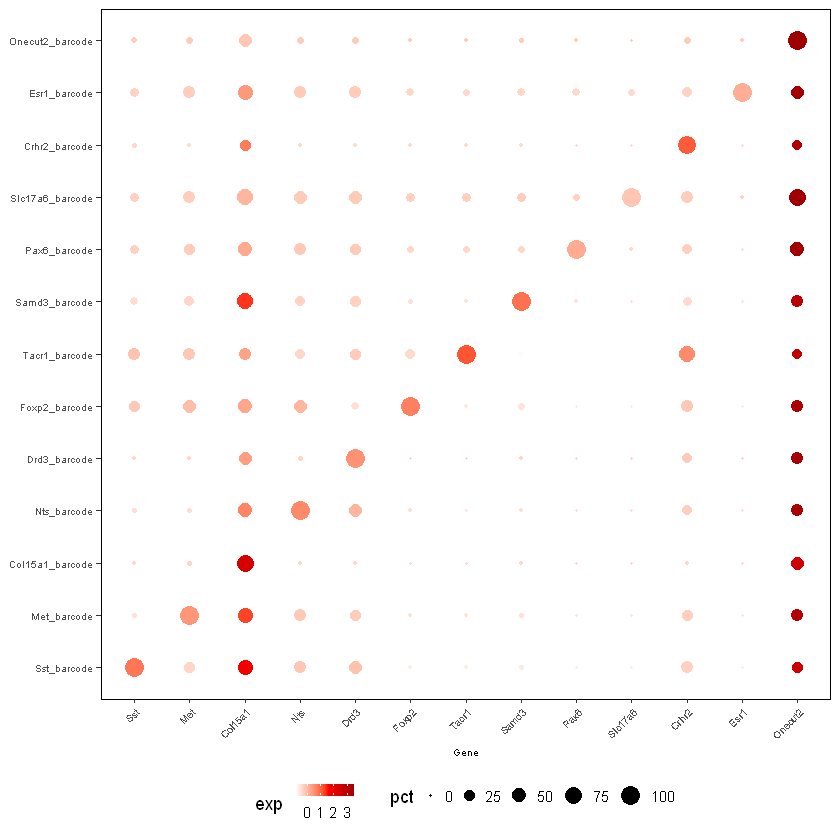

In [391]:
ggplot(df.plot, aes(x=variable, y=rownames))+
  geom_point(aes(size=pct, color=exp))+
  scale_color_gradient2(low = "white",high = "darkred", mid='red', midpoint=1.5) +
  scale_size(range=c(0.5,5)) +
  theme_classic() +
  theme(panel.background = element_rect(colour = "black", size=.25, fill=NA, linetype="solid"),
        axis.line=element_line(size=0.25),
        axis.ticks=element_line(size=0.25),
        axis.text.y = element_text(size=6),
        axis.text.x = element_text( size=6, angle=45, hjust=1),
        axis.title.y = element_blank(),
        axis.title.x = element_text(size=6),
        legend.position='bottom',
        legend.key.size = unit(0.25, 'cm'))+
  xlab('Coordinates from Bregma') +
  ylab('Gene') + coord_flip()
ggsave('HCR_snRNAseq_files/LS_HCR_discplot.pdf',width=5, height=4)

Will now use the DotPlot function to extract the percent of cells expressing each gene. Can also use the information caluclated above, as they are the same. This is just what we did originally for the correlation analysis

In [390]:
hcr.avg <- DotPlot(LS.HCR,feature=c('Col15a1','Met','Nts','Sst','Crhr2','Drd3','Esr1','Foxp2','Tacr1','Pax6','Drd2','Samd3','Onecut2','Slc17a6','Slc32a1'), scale=FALSE, cols=c('gray','red'), assay='RNA')$data
hcr.avg

,avg.exp,pct.exp,features.plot,id,avg.exp.scaled
,<dbl>,<dbl>,<fct>,<fct>,<dbl>
Col15a1,7.627229e+125,53.03726391,Col15a1,Sst,2.898549e+02
Met,2.691396e+07,22.80598421,Met,Sst,1.710816e+01
Nts,6.829584e+13,34.30321593,Nts,Sst,3.185487e+01
Sst,1.931525e+14,99.68979464,Sst,Sst,3.289450e+01
Crhr2,2.374469e+06,29.22605725,Crhr2,Sst,1.468028e+01
Drd3,7.229263e+09,37.22857031,Drd3,Sst,2.270140e+01
Esr1,5.788399e-03,0.00392665,Esr1,Sst,5.771711e-03
Foxp2,1.789800e+00,0.39266502,Foxp2,Sst,1.025970e+00
Tacr1,8.597140e+00,0.28271881,Tacr1,Sst,2.261465e+00


In [ ]:
saveRDS(hcr.avg, file="HCR_snRNAseq_files/LS_HCR_marker_expression_df.rds")